In [1]:
# Import all the necessary libraries.
import numpy as np
import timeit
import matplotlib.pyplot as plt
import csv
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeavePOut


## Vectors Reading

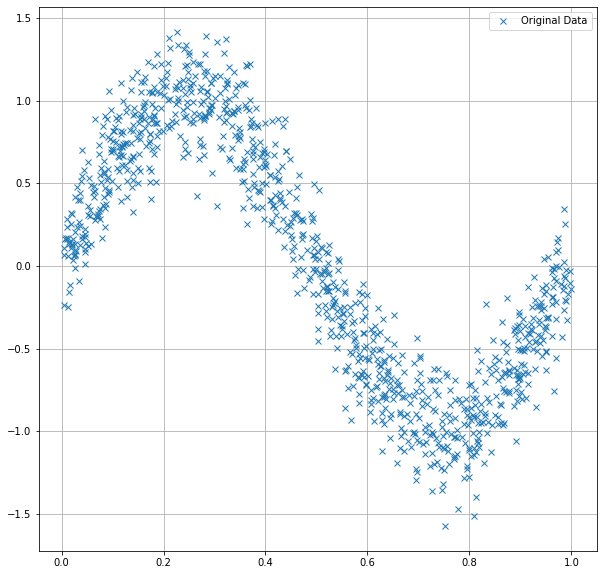

In [2]:
# Reading of Table data
df = pd.read_csv('./poly_reg_p.csv', header=None)
                 
x = df[0].to_numpy()
y = df[1].to_numpy()

# Vector Transformation to Columns
x = x.reshape(len(x),1)
y = y.reshape(len(y),1)

fig = plt.figure(figsize=(10,10))
plt.plot(x, y, 'x', label='Original Data')

#plt.plot(x, y)
plt.legend()
plt.grid()

## Holdout Cross-validation (70/30%)

In [3]:
# Get timestamp of holdout start.
starttime = timeit.default_timer()

include_bias = False

# Split the whole set into random training and validation set.
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=10)

print('tamanho conjunto de treinamento:', len(y_train))
print('tamanho conjunto de validação:', len(y_val))

error_train = []
error_val = []


for d in range(1, 21):
    # Instantiate a polynomial.
    poly_features = PolynomialFeatures(degree=d, include_bias=include_bias)
    # Instantiate a scaler.
    std_scaler = StandardScaler()
    # Instantiate a linear regressor.
    lin_reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])
    
    # Perform polynomial regression.Training sets for test and validation.
    polynomial_regression.fit(x_val, y_val)
    polynomial_regression.fit(x_train, y_train)
    
    # Prediction sets for test and validation
    y_val_predict = polynomial_regression.predict(x_val)
    y_train_predict = polynomial_regression.predict(x_train)
    
    # Erro quadrático médio para os conjuntos de teste e validação.
    error_val.append(np.sqrt(mean_squared_error(y_val, y_val_predict)))
    error_train.append(np.sqrt(mean_squared_error(y_train, y_train_predict)))

print("Tempo de execução: %1.4f [s]" % (timeit.default_timer() - starttime))

tamanho conjunto de treinamento: 700
tamanho conjunto de validação: 300
Tempo de execução: 0.1465 [s]


## Mean Square Error vs. Polynomial order - Holdout

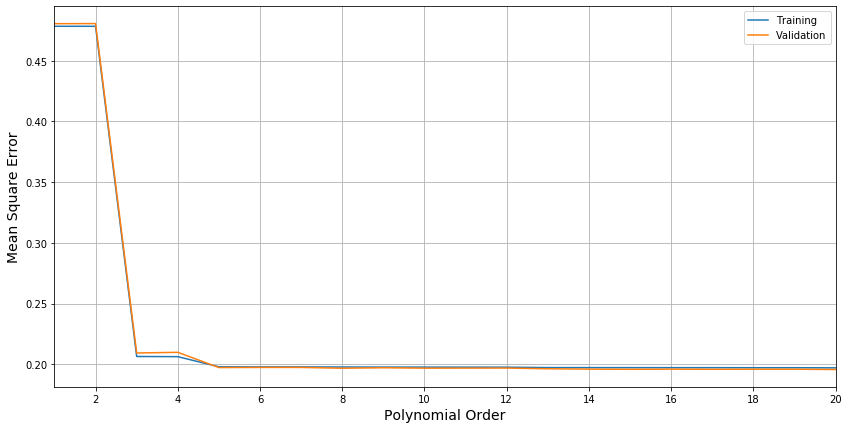

In [4]:
# Plot results.
plt.figure(figsize=(14, 7))
plt.plot(range(1, 21), error_train, label='Training')
plt.plot(range(1, 21), error_val, label='Validation')
plt.xlabel('Polynomial Order',  fontsize=14)
plt.ylabel('Mean Square Error',  fontsize=14)
plt.xticks(range(0, 21, 2))
plt.xlim([1, 20])
plt.legend()
plt.grid()
# Save figure
#plt.savefig("holdout.png", dpi=600)
#Show the plot.
plt.show()

## k-fold cross-validation (k=10)

In [5]:
# Get timestamp of holdout start.
starttime = timeit.default_timer()

# Instantiate the k-Fold object.
kfold = KFold(n_splits=10, shuffle=True, random_state=100)

mean_vec = []
std_vec = []

for d in range(1, 21):
    # Instantiate a polynomial.
    poly_features = PolynomialFeatures(degree=d, include_bias=include_bias)
    # Instantiate a scaler.
    std_scaler = StandardScaler()
    # Instantiate a linear regressor.
    lin_reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])

    lin_scores = cross_val_score(polynomial_regression, x, y, scoring='neg_mean_squared_error', cv=kfold)
        
    scores = np.sqrt(-lin_scores)
    mean_vec.append(scores.mean())
    std_vec.append(scores.std())

print("Tempo de execução: %1.4f [s]" % (timeit.default_timer() - starttime))

Tempo de execução: 0.7487 [s]


## Mean Square Error and Standard Deviation - K-fold

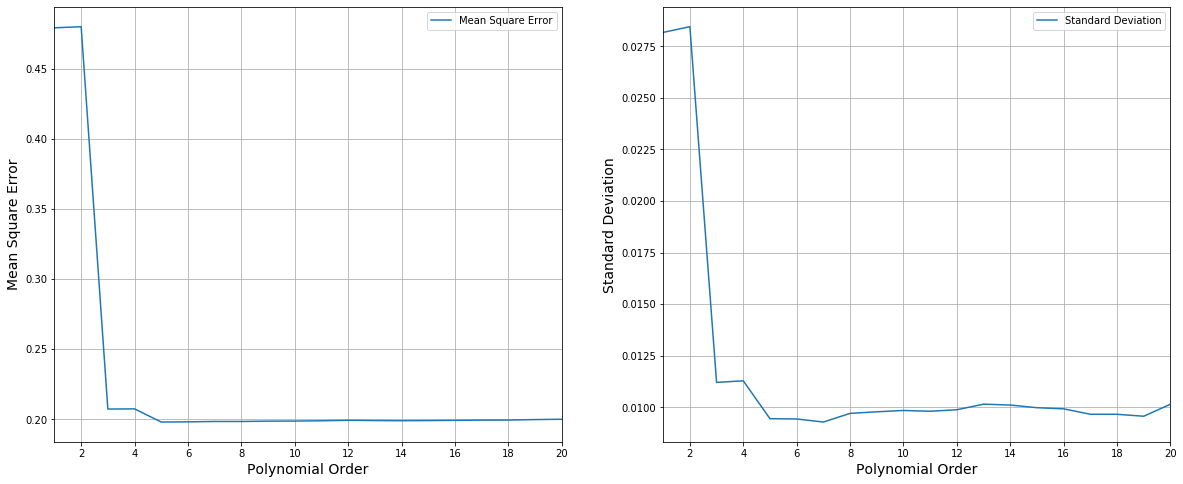

In [6]:
# Plot results.

plt.figure(figsize=(20, 8))
ax = plt.subplot(1, 2, 1)
plt.xlabel('Polynomial Order',  fontsize=14)
plt.ylabel('Mean Square Error',  fontsize=14)
plt.plot(range(1, 21), mean_vec,  label='Mean Square Error')
plt.xticks(range(0, 21, 2))
plt.xlim([1, 20])
plt.legend()
plt.grid()

ax = plt.subplot(1, 2, 2)
plt.xlabel('Polynomial Order',  fontsize=14)
plt.ylabel('Standard Deviation',  fontsize=14)
plt.plot(range(1, 21), std_vec,  label='Standard Deviation')
plt.xticks(range(0, 21, 2))
plt.xlim([1, 20])
plt.legend()
plt.grid()

# Save figure
#plt.savefig("kfold.png", dpi=600)
#Show the plot.
plt.show()

## Leave-p-out cross-validation (p=1)

In [7]:
# Get timestamp of holdout start.
starttime = timeit.default_timer()

# Instantiate the LPOCV object.
lpocv = LeavePOut(p=1)

mean_vec = []
std_vec = []
for d in range(1, 21):
    # Instantiate a polynomial.
    poly_features = PolynomialFeatures(degree=d, include_bias=include_bias)
    # Instantiate a scaler.
    std_scaler = StandardScaler()
    # Instantiate a linear regressor.
    lin_reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])

    lin_scores = cross_val_score(polynomial_regression, x, y, scoring='neg_mean_squared_error', cv=lpocv)
        
    scores = np.sqrt(-lin_scores)
    mean_vec.append(scores.mean())
    std_vec.append(scores.std())
    
print("Tempo de execução: %1.4f [s]" % (timeit.default_timer() - starttime))

Tempo de execução: 65.3362 [s]


## Mean Square Error and Standard Deviation - Leave-p-out

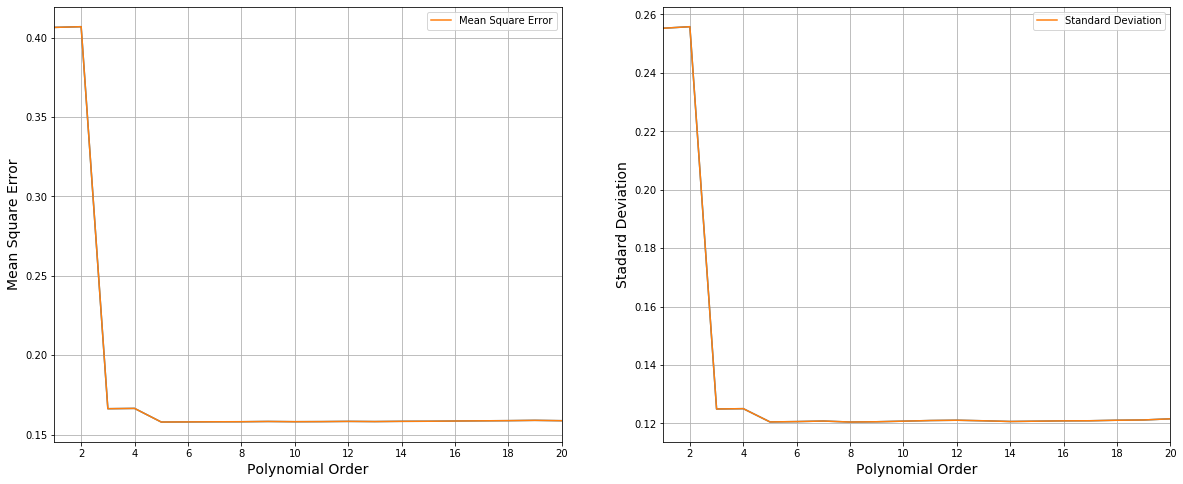

In [8]:
# Plot results.
plt.figure(figsize=(20, 8))
ax = plt.subplot(1, 2, 1)
plt.plot(range(1, 21), mean_vec)
plt.xlabel('Polynomial Order', fontsize=14)
plt.ylabel('Mean Square Error', fontsize=14)
plt.plot(range(1, 21), mean_vec,  label='Mean Square Error')
plt.xticks(range(0, 21, 2))
plt.xlim([1, 20])
plt.legend()
plt.grid()

ax = plt.subplot(1, 2, 2)
plt.plot(range(1, 21), std_vec)
plt.xlabel('Polynomial Order', fontsize=14)
plt.ylabel('Stadard Deviation', fontsize=14)
plt.plot(range(1, 21), std_vec,  label='Standard Deviation')
plt.xticks(range(0, 21, 2))
plt.xlim([1, 20])
plt.legend()
plt.grid()

# Save figure
#plt.savefig("leave_p_out.png", dpi=600)
#Show the plot.
plt.show()

## Learning-curves

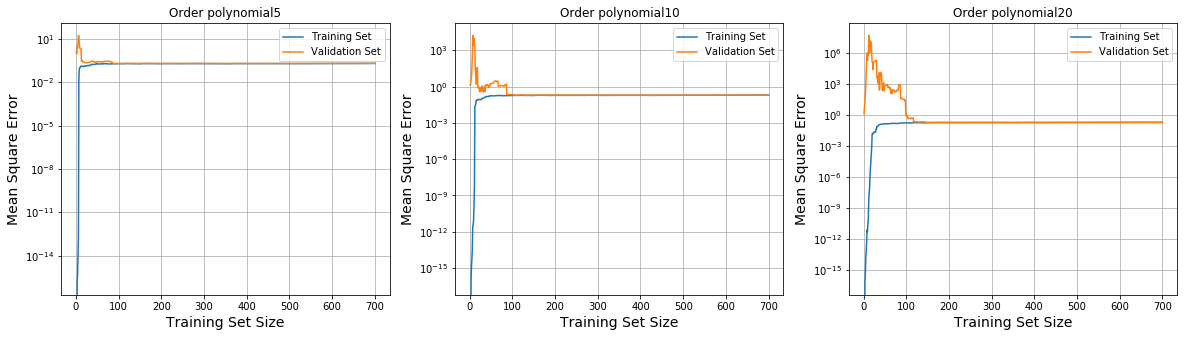

In [9]:
# Polinomial degrees to be tested.
degrees = [5, 10, 20]

plt.figure(figsize=(20, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)

    # Instantiate a polynomial.
    poly_features = PolynomialFeatures(degree=degrees[i], include_bias=include_bias)
    # Instantiate a scaler.
    std_scaler = StandardScaler()
    # Instantiate a linear regressor.
    lin_reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])

    error_training = []
    error_validation = []
    for m in range(1,len(x_train)+1):

        # Perform polynomial regression.
        polynomial_regression.fit(x_train[:m], y_train[:m])

        # Use the trained model for prediction of the training set.
        y_train_predict = polynomial_regression.predict(x_train[:m])

        # Use the trained model for prediction of the validation set.
        y_val_predict = polynomial_regression.predict(x_val)       

        # Calculate MSE for training set.
        error_training.append(mean_squared_error(y_train[:m], y_train_predict))

        # Calculate MSE for validation set.
        error_validation.append(mean_squared_error(y_val, y_val_predict))       

    plt.plot(range(1,len(x_train)+1), np.sqrt(error_training), label='Training Set')
    plt.plot(range(1,len(x_train)+1), np.sqrt(error_validation), label='Validation Set')
    plt.yscale('log')
    plt.xlabel('Training Set Size', fontsize=14)
    plt.ylabel('Mean Square Error', fontsize=14)
    plt.grid()
    plt.title('Order polynomial'+str(degrees[i]))
    plt.legend(loc='best')
    
# Save figure
#plt.savefig("learning_curves.png", dpi=600)
#Show the plot.
plt.show()

## Model training

In [10]:
# Best polynomial order
degree = 5

# Instantiate a polynomial with the given degree.
poly_features = PolynomialFeatures(degree=degree, include_bias=include_bias)

# Instantiate a scaler that will standardize the features.
std_scaler = StandardScaler()

# Instantiate a linear regressor.
lin_reg = LinearRegression()

# Create a pipeline of actions.
polynomial_regression = Pipeline([
    ("poly_features", poly_features),
    ("std_scaler", std_scaler),
    ("lin_reg", lin_reg),
    ])

# Train model
polynomial_regression.fit(x, y)
   
# Predição do conjunto de treinamento.    
y_predicao = polynomial_regression.predict(x)
  

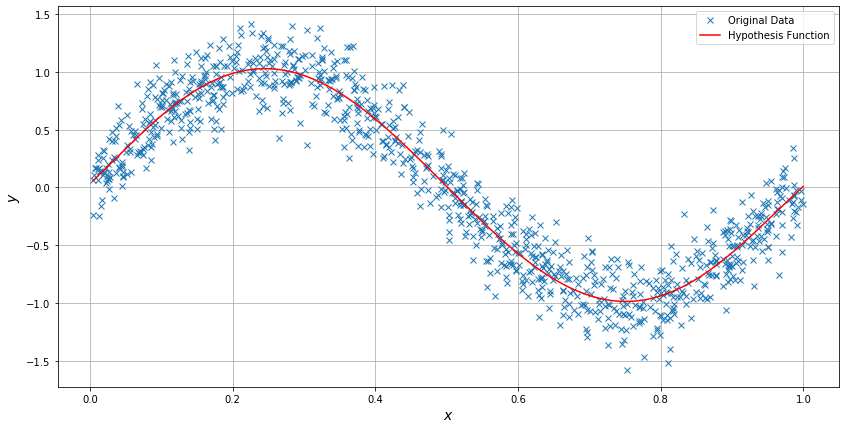

In [11]:
# Plot error.
fig = plt.figure(figsize=(14,7))
plt.plot(x, y, 'x', label="Original Data")
plt.plot(x, y_predicao, 'r', label="Hypothesis Function")
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('$ x $', fontsize=14)
plt.ylabel('$ y $', fontsize=14)
#plt.legend(loc='upper right')
plt.legend()
plt.grid()
# Save figure
#plt.savefig("ridge_regression_mse.png", dpi=600)
#Show the plot.
plt.show()